# Analysis of Live Electric Heater Data: Voltage, Current, Power, and Frequency

This Jupyter notebook aims to provide an exploratory data analysis (EDA) of live readings from an electrical heater. The dataset, uniquely created using a combination of transducers, signal conditioning circuits, and a NodeMCU microcontroller, is hosted on ThingSpeak, an IoT platform that allows us to aggregate, visualize, and analyze live data streams.

Our dataset comprises measurements of **voltage**, **current**, **frequency of voltage and current**, **apparent power**, **active power**, and the **power factor**. It not only offers a comprehensive insight into the functioning of the heater under standard conditions but also allows us to observe changes in behavior when the heater is switched to a higher power setting. Furthermore, this data presents an opportunity to examine and understand the kinds of errors and anomalies that can occur during such measurements.

The primary objectives of this analysis are:

- Data Understanding and Cleaning: Assess the quality of the data, understand the errors and anomalies present, and, if necessary, clean and preprocess the dataset for further analysis.

- Descriptive Analysis: Derive basic metrics and create visualizations to understand the distribution, frequency, and correlation of the variables.

- Operational Behavior Analysis: Analyze the variation of different parameters over time and identify any interesting trends or patterns. Pay special attention to changes in heater behavior when power settings are increased.

- Operational Efficiency: Evaluate the efficiency of the heater by analyzing the relationship between active power, apparent power, and power factor.

- Error Analysis: Investigate the nature of measurement errors and their potential impact on the data analysis and interpretation.

- Predictive Analysis: Based on the descriptive and temporal analysis, build a predictive model to forecast future values of interest (like power consumption).

This notebook presents an ideal opportunity to explore how electrical parameters interact with each other and how they are affected by different operational settings, providing valuable insights into the behavior and efficiency of the electric heater.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [19]:
df = pd.read_csv('feed.csv')

In [20]:
print(df.columns)
print(df.dtypes)
df.head()

Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7'],
      dtype='object')
created_at     object
entry_id        int64
field1        float64
field2        float64
field3        float64
field4        float64
field5        float64
field6        float64
field7        float64
dtype: object


created_at  entry_id     field1    field2   field3    field4  \
0  2023-06-07 10:10:34 UTC         1  223.48946  50.34014  5.03035  50.73617   
1  2023-06-07 10:11:35 UTC         2  223.36674  50.68027  5.03744  51.22549   
2  2023-06-07 10:12:36 UTC         3  227.41612  50.34681  5.09142  52.08334   
3  2023-06-07 10:13:38 UTC         4  228.10913  50.68028  5.11423  51.21841   
4  2023-06-07 10:14:39 UTC         5  227.09798  50.68028  5.08686  50.88494   

       field5      field6   field7  
0  1031.80457  1124.23181  0.91779  
1  1032.53503  1125.19592  0.91765  
2  1064.09802  1157.87415  0.91901  
3  1073.23743  1166.60840  0.91996  
4  1061.70496  1155.22534  0.91904

In [21]:
# Rename columns
column_names = {
    'created_at': 'Timestamp',
    'field1': 'RMSVoltage',
    'field2': 'VoltageFrequency',
    'field3': 'RMSCurrent',
    'field4': 'CurrentFrequency',
    'field5': 'ActivePower',
    'field6': 'ApparentPower',
    'field7': 'PowerFactor'
}
df.rename(columns=column_names, inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].dt.tz_convert(None)
df.drop(columns=['entry_id'], inplace=True)

In [22]:
print(df.dtypes)
df.head()

Timestamp           datetime64[ns]
RMSVoltage                 float64
VoltageFrequency           float64
RMSCurrent                 float64
CurrentFrequency           float64
ActivePower                float64
ApparentPower              float64
PowerFactor                float64
dtype: object


Timestamp  RMSVoltage  VoltageFrequency  RMSCurrent  \
0 2023-06-07 10:10:34   223.48946          50.34014     5.03035   
1 2023-06-07 10:11:35   223.36674          50.68027     5.03744   
2 2023-06-07 10:12:36   227.41612          50.34681     5.09142   
3 2023-06-07 10:13:38   228.10913          50.68028     5.11423   
4 2023-06-07 10:14:39   227.09798          50.68028     5.08686   

   CurrentFrequency  ActivePower  ApparentPower  PowerFactor  
0          50.73617   1031.80457     1124.23181      0.91779  
1          51.22549   1032.53503     1125.19592      0.91765  
2          52.08334   1064.09802     1157.87415      0.91901  
3          51.21841   1073.23743     1166.60840      0.91996  
4          50.88494   1061.70496     1155.22534      0.91904

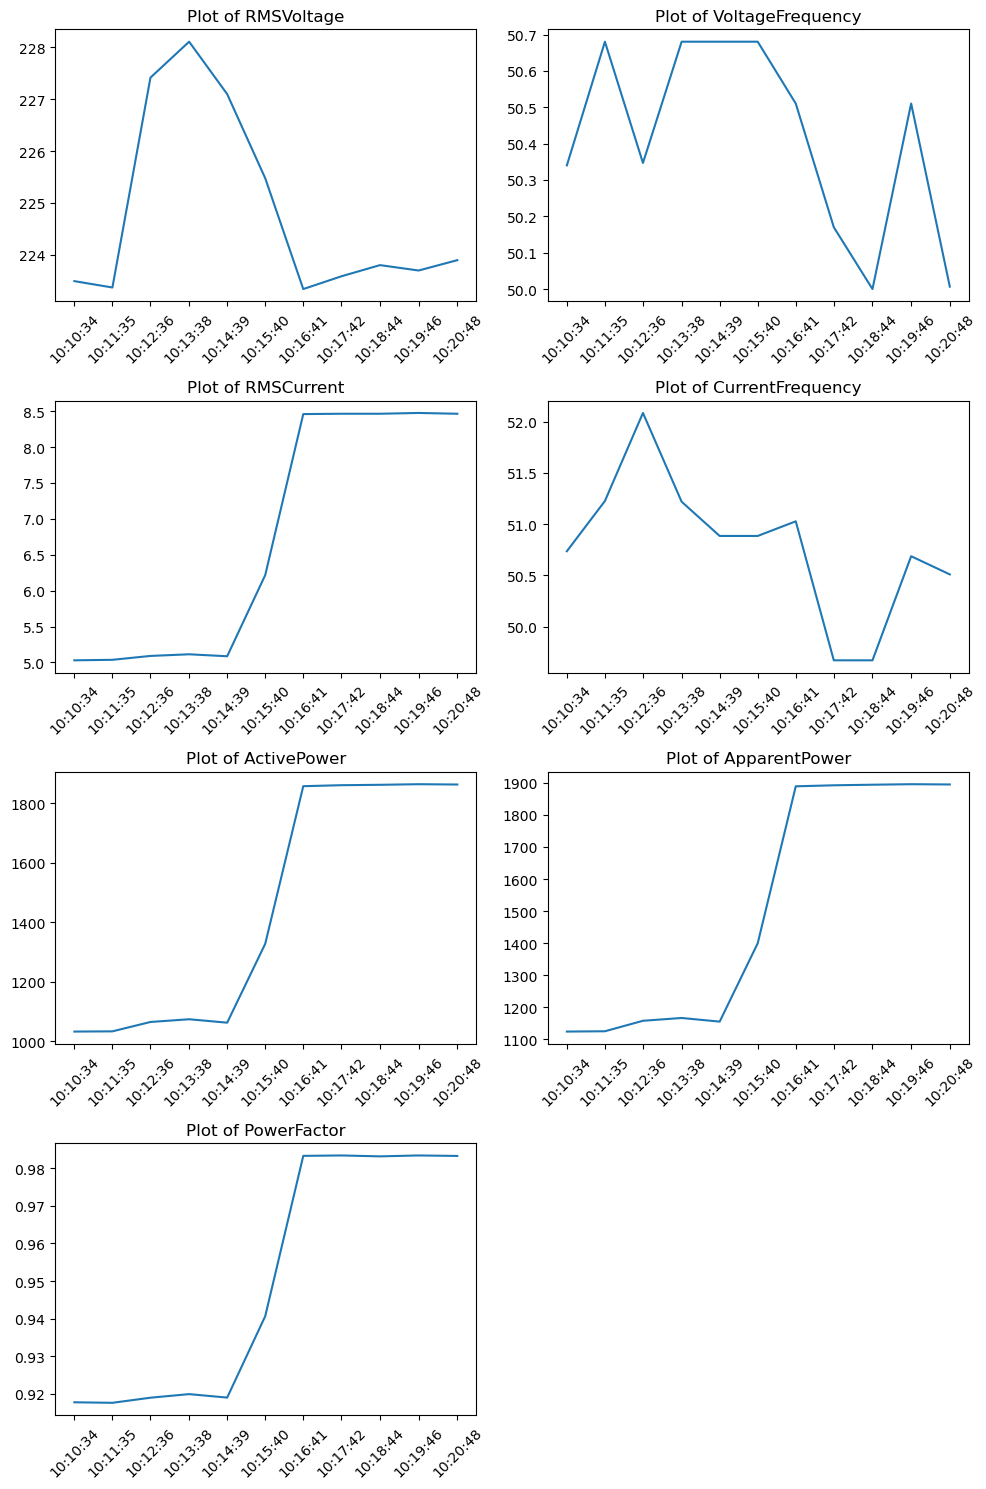

In [23]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
# Remove the last (extra) subplot
fig.delaxes(axes[3][1])
date_format = mdates.DateFormatter('%H:%M:%S')  # hours:minutes:seconds
# Plot in each subplot
for i in range(4):
    for j in range(2):
        if i == 3 and j == 1:  # skip the last subplot
            continue
        datetime_range = df[df.columns[i * 2 + j + 1]]
        axes[i][j].plot(df['Timestamp'], datetime_range)
        axes[i][j].set_title('Plot of {}'.format(df.columns[i * 2 + j + 1]))
        axes[i][j].set_xticks(df['Timestamp'])
        axes[i][j].xaxis.set_major_formatter(date_format)
        for label in axes[i][j].get_xticklabels():
            label.set_rotation(45)  # rotate x labels 45 degrees

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
# Show the plot
plt.show()

In [24]:
df[df.columns[1:]].mean()

RMSVoltage           224.841884
VoltageFrequency      50.418655
RMSCurrent             6.718316
CurrentFrequency      50.782250
ActivePower         1445.334795
ApparentPower       1508.643576
PowerFactor            0.950054
dtype: float64

In [25]:
absErrorCorrente = abs(df[df.columns[1:]].mean()['CurrentFrequency'] - 50)
print(f"CurrentFrequency: Absolute error: {absErrorCorrente}. Relative error: {absErrorCorrente*100/50}%")

CurrentFrequency: Absolute error: 0.7822499999999977. Relative error: 1.5644999999999953%


In [26]:
absErrorCorrente = abs(df[df.columns[1:]].mean()['VoltageFrequency'] - 50)
print(f"VoltageFrequency: Absolute error: {absErrorCorrente}. Relative error: {absErrorCorrente*100/50}%")

VoltageFrequency: Absolute error: 0.41865454545455094. Relative error: 0.8373090909091019%


/tmp/ipykernel_12070/2676137308.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['VoltageFrequency'])


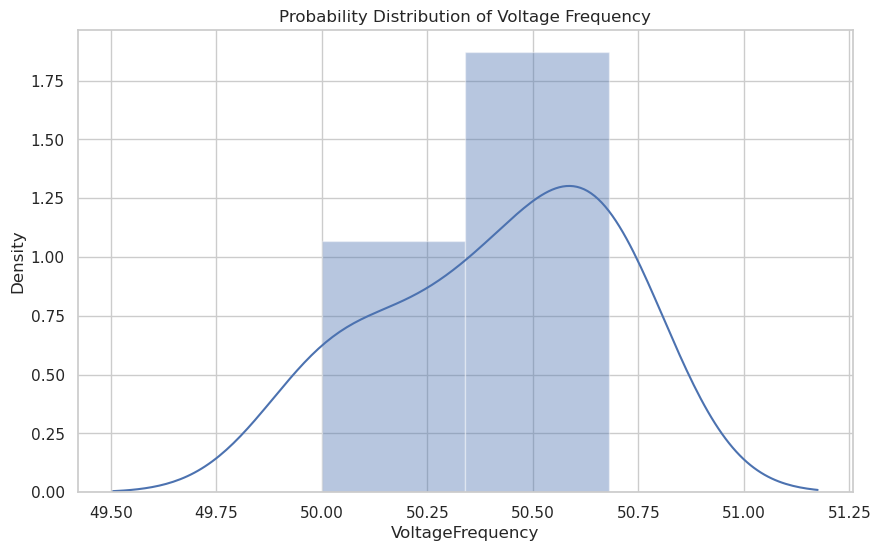

In [27]:
# Set the style and size of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Plot the distribution of 'VoltageFrequency'
sns.distplot(df['VoltageFrequency'])
#sns.displot(df['VoltageFrequency'], kde=True)

# Set the title of the plot
plt.title('Probability Distribution of Voltage Frequency')

# Show the plot
plt.show()